## Cats and dogs classification

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Paths and Categories

In [2]:
DIRECTORY = r"C:\Users\azwin\OneDrive\Desktop\PetImages"
CATEGORIES = ['cat', 'dog']


### Data PreProcessing

In [3]:

from sklearn.model_selection import train_test_split


IMG_SIZE = 90
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category) 
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        if img.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff', 'gif')):
            img_arr = cv2.imread(img_path)
            if img_arr is not None:
                img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([img_arr, label])
            else:
                print(f"Error loading image: {img_path}")
        else:
            print(f"Skipping non-image file: {img_path}")



Skipping non-image file: C:\Users\azwin\OneDrive\Desktop\PetImages\dog\Thumbs.db


In [6]:
random.shuffle(data)
X = np.array([item[0] for item in data], dtype='float32') / 255.0  
y = np.array([item[1] for item in data], dtype='int32')

### Train/Test split

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<Axes: >

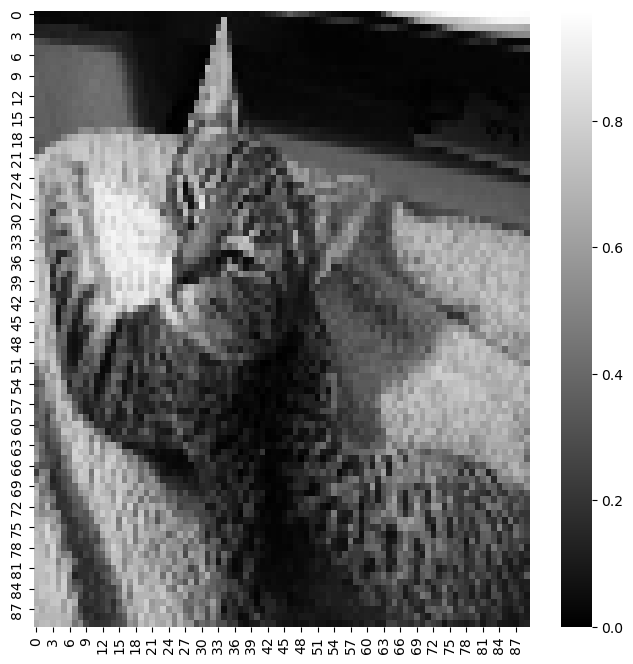

In [8]:
grayscale_image = rgb2gray(X_train[0])  
plt.figure(figsize=(8, 8))
sns.heatmap(grayscale_image, cmap='gray', annot=False)

In [9]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)


In [10]:
print(f"Training data: {len(X_train)} samples")
print(f"Validation data: {len(X_val)} samples")
print(f"Test data: {len(X_test)} samples")

Training data: 17462 samples
Validation data: 3742 samples
Test data: 3742 samples


### Model Training

In [11]:
input_shape = (IMG_SIZE, IMG_SIZE, 3)
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
    
])# Sigmoid for binary classification




C:\Users\azwin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Compile and fitting

In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])


In [13]:
history = model.fit(
    X_train, y_train,  
    epochs=20,  
    batch_size=35,  
    validation_data=(X_val, y_val)  
)

Epoch 1/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 112s 217ms/step - accuracy: 0.5234 - loss: 0.6933 - val_accuracy: 0.5933 - val_loss: 0.6674
Epoch 2/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 105s 211ms/step - accuracy: 0.6175 - loss: 0.6464 - val_accuracy: 0.6603 - val_loss: 0.6070
Epoch 3/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 108s 216ms/step - accuracy: 0.6940 - loss: 0.5790 - val_accuracy: 0.6782 - val_loss: 0.5773
Epoch 4/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 107s 213ms/step - accuracy: 0.7206 - loss: 0.5447 - val_accuracy: 0.7384 - val_loss: 0.5275
Epoch 5/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 106s 212ms/step - accuracy: 0.7450 - loss: 0.5139 - val_accuracy: 0.7312 - val_loss: 0.5171
Epoch 6/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 106s 213ms/step - accuracy: 0.7540 - loss: 0.5000 - val_accuracy: 0.7787 - val_loss: 0.4847
Epoch 7/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 105s 211ms/step - accuracy: 0.7595 - loss: 0.4929 - val_accuracy: 0.7344 - val_loss: 0.5144
Epoch 8/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 106s 212ms/step - accuracy: 0.7733 -

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 90, 90, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,623,621 (13.82 MB)

 Trainable params: 1,207,873 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,415,748 (9.22 MB)

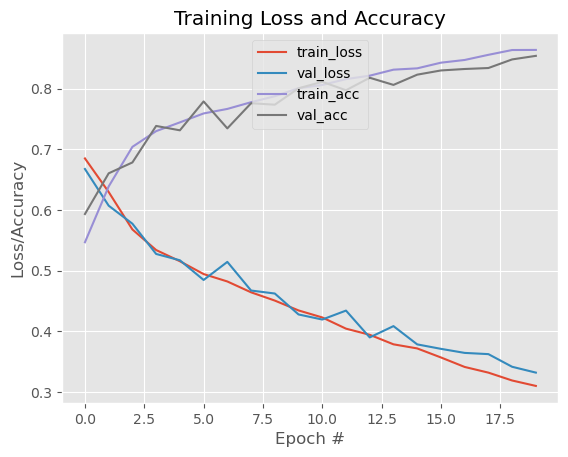

In [15]:
import matplotlib.pyplot as plt
import numpy as np


epochs = 20  

# Plotting
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model.history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model.history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model.history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper center")
plt.show()


## Model Prediction

117/117 - 4s - 34ms/step - accuracy: 0.8455 - loss: 0.3546
Test Loss: 0.35464969277381897
Test Accuracy: 0.8455371260643005
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
Classification Report:
              precision    recall  f1-score   support

         cat       0.83      0.87      0.85      1866
         dog       0.86      0.82      0.84      1876

    accuracy                           0.85      3742
   macro avg       0.85      0.85      0.85      3742
weighted avg       0.85      0.85      0.85      3742

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\azwin\AppData\Local\Temp\ipykernel_13024\1851305202.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = CATEGORIES[int(prediction > 0.5)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


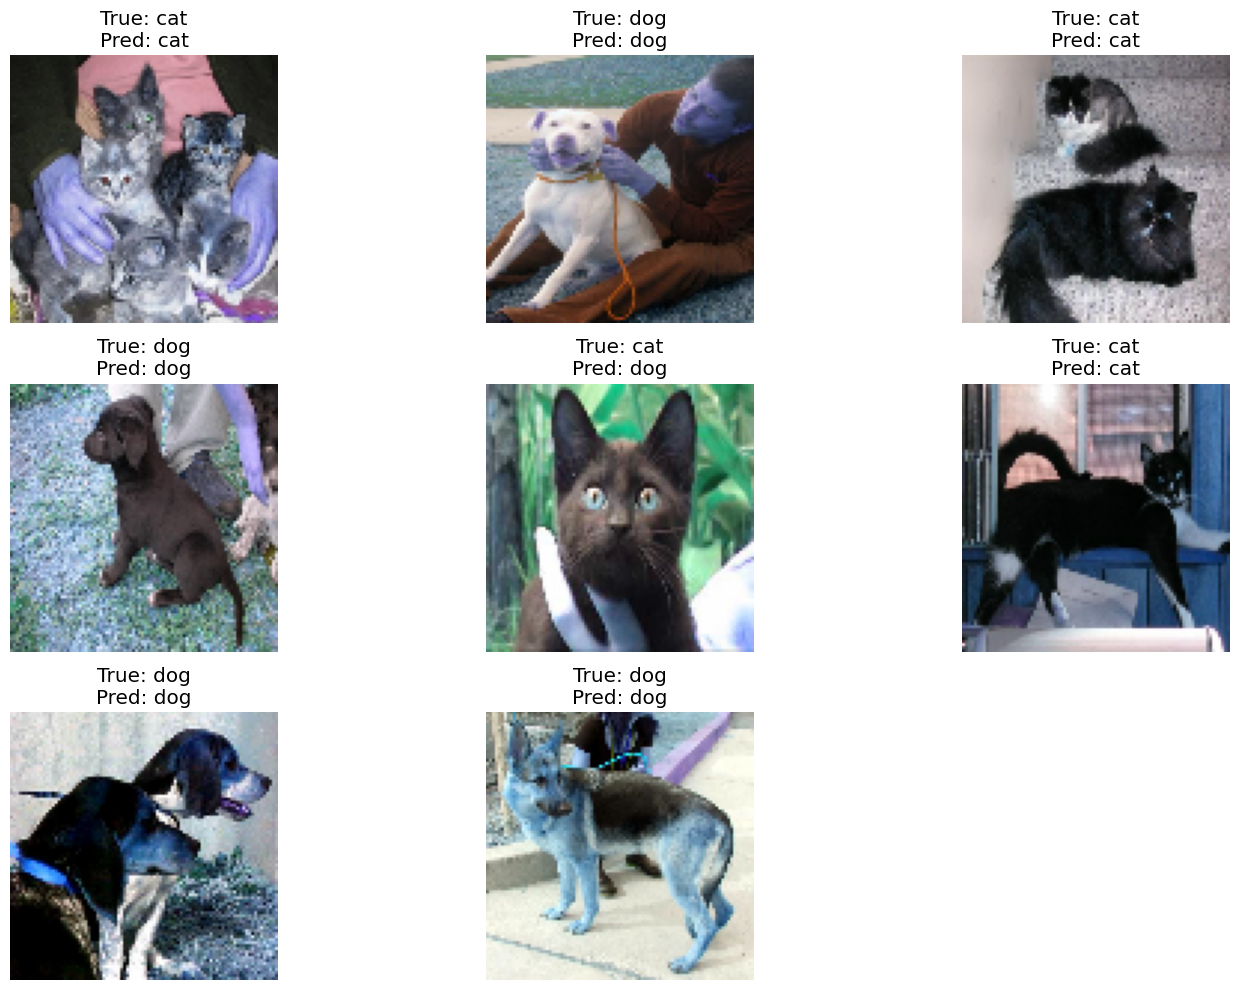

In [48]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


predictions = (model.predict(X_test) > 0.5).astype("int32")  
print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=CATEGORIES))


def display_predictions(images, labels, start, end):
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(range(11, 19), 1):  
        test_image = images[idx]
        img = np.expand_dims(test_image, axis=0) 
        prediction = model.predict(img)  
        predicted_label = CATEGORIES[int(prediction > 0.5)]  
        true_label = CATEGORIES[labels[idx]]  

        
        plt.subplot(3, 3, i)  
        plt.imshow(test_image)
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


display_predictions(X_test, y_test, start=1, end=10)


## Conclusion

###
> Images from the dataset were resized to a uniform dimension of 90x90x3, Pixel values were normalized to the range [0, 1] for better convergence during training.Labels (0 for "cat" and 1 for "dog") were kept in their original integer format, as it is a binary classification problem.

> The data was split into three sets:
  >Training Set: 70% of the data.
  >Validation Set: 15% of the data.
  >Test Set: 15% of the data.

> The model achieved a steadily increasing accuracy during training and Reasonable validation accuracy indicated good generalization.The model performed well on unseen test data, achieving accurate predictions on a majority of the samples.

> The precision, recall, and F1-score for each class (cat and dog) were computed and the analysis showed balanced performance across both classes, with minimal bias.

> HyperParameter Tuning were performed adjusting the learning rate and batch size to yield better results.
